# This is an Example of using Xarray on the EFAS NetCDF File

First we use Xarray to Open the Dataset so we can see the contents

In [3]:
import xarray as xr

ds = xr.open_dataset('../data/clim_151118.nc')

In [4]:
ds

<xarray.Dataset>
Dimensions:                       (time: 15, x: 1000, y: 950)
Coordinates:
  * y                             (y) float64 5.498e+06 5.492e+06 ... 7.525e+05
  * x                             (x) float64 2.502e+06 2.508e+06 ... 7.498e+06
  * time                          (time) datetime64[ns] 2018-11-15T06:00:00 ... 2018-11-29T06:00:00
    step                          timedelta64[ns] ...
    surface                       int64 ...
    latitude                      (y, x) float32 ...
    longitude                     (y, x) float32 ...
    valid_time                    (time) datetime64[ns] ...
Data variables:
    dis24                         (time, y, x) float32 ...
    lambert_azimuthal_equal_area  int32 ...
    land_binary_mask              (y, x) int8 ...
    upArea                        (y, x) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    G

We can see that the file contains X and Y, Latitude and Longitude, Information about the Lambert_Azimuthal_Equal_Area Projection and a variable called dis24. Discharge over the last 24 Hour Period.

To Access the values in the file we can simply type

<IPython.core.display.Javascript object>


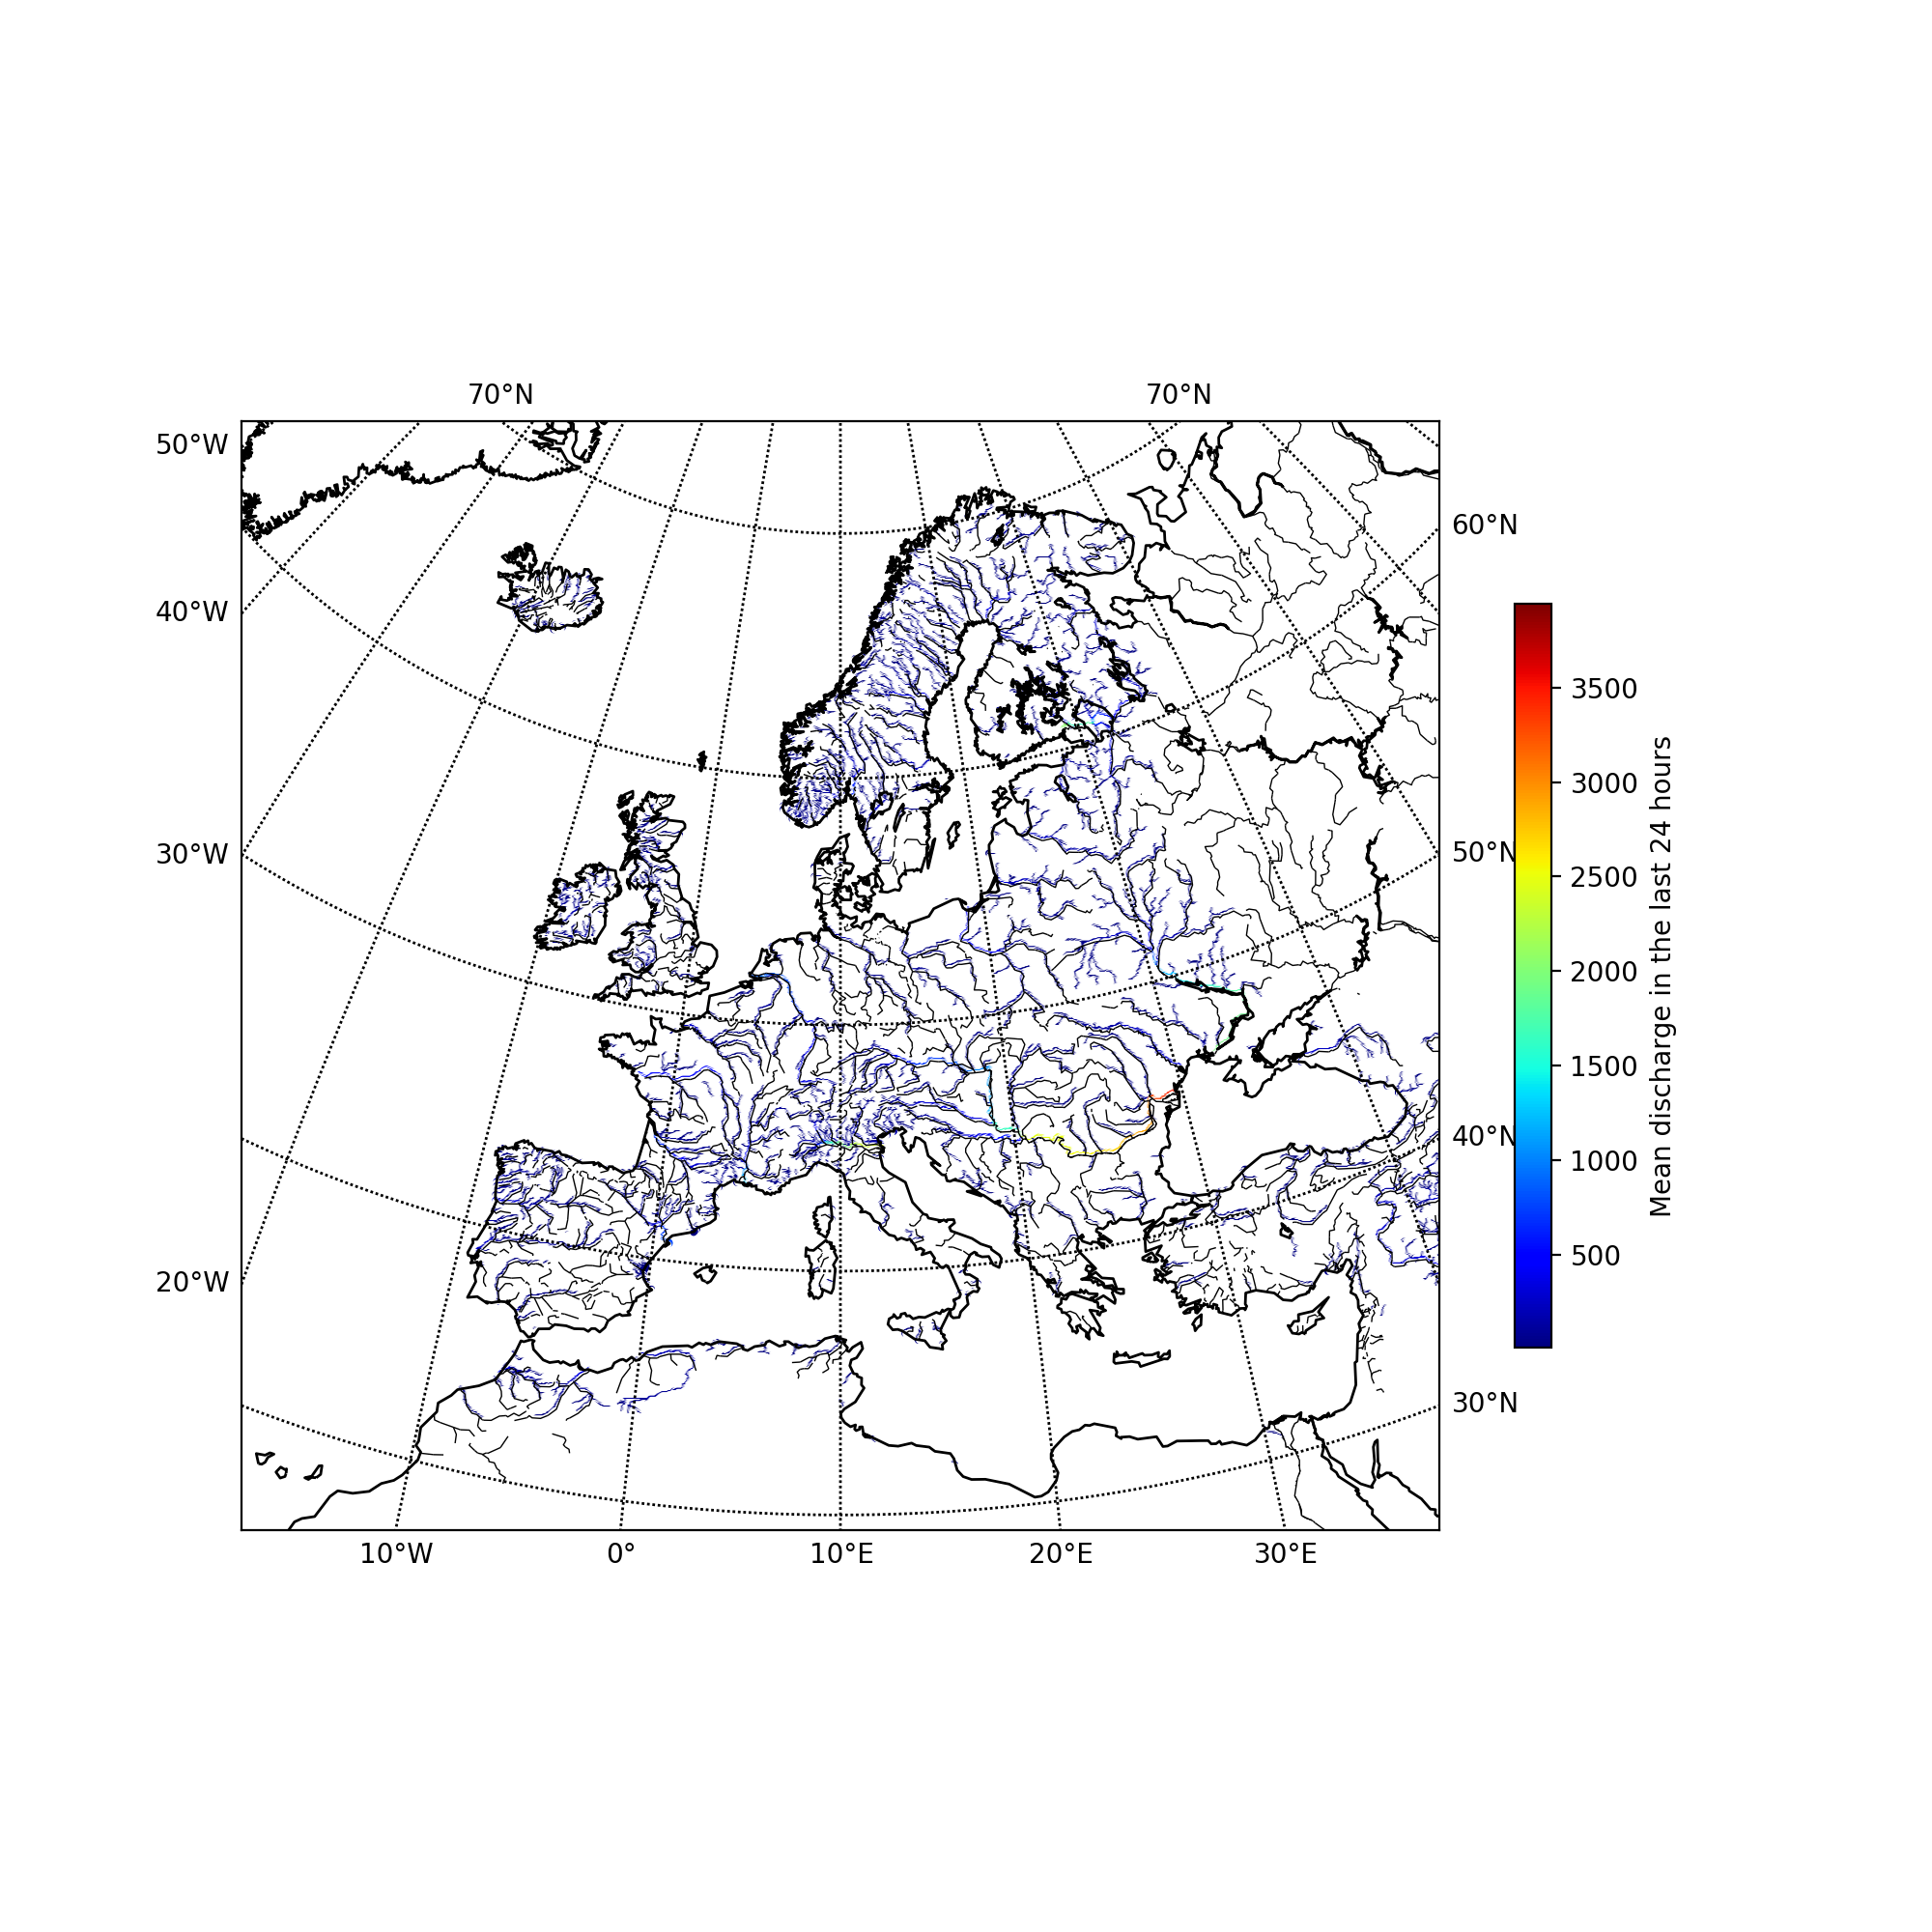

In [5]:
%matplotlib notebook
import matplotlib.pyplot as plot
from mpl_toolkits.basemap import Basemap,cm
import numpy as np
import pandas as pd

plot.figure(ds.dis24.GRIB_name,figsize=(10,10))
plot.Rectangle

m = Basemap(width=5400000,height=5000000,
            resolution='l',projection='laea',\
            lat_ts=65,lat_0=52,lon_0=10.)

m.drawparallels(np.arange(-80.,81.,10.),labels=[False, True, True, False])
m.drawmeridians(np.arange(-180.,181.,10.), labels=[True,False,False,True])
m.drawcoastlines()
m.drawrivers()
#plot.axis('on')
cmap = plot.cm.get_cmap('jet')
cmap.set_under('white')
x,y=m(ds.longitude.values,ds.latitude.values)
sc=plot.scatter(x,y,c=ds.dis24[1,:,:].values,s=10,vmin=10,cmap=cmap,marker='.')
cbar = plot.colorbar(sc, shrink=.5,)
cbar.set_label(ds.dis24.GRIB_name)